<a href="https://colab.research.google.com/github/havanluan/CS114.K21/blob/master/Giuaki_Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

***Lấy data từ link bằng thư viện pandas***

Dùng method read_csv của pandas để đọc file txt từ link đưa vào.

Method này sẽ đọc link và tạo ra một DataFrame với các cột lần lượt là size và time tương ứng. 

Ta cần rename lại các cột

In [0]:
import pandas as pd

In [0]:
url = "http://cs.uit.edu.vn/data3.txt"

In [0]:
data = pd.read_csv(url, header = None)


In [0]:
data.columns = ['Size','Time']

In [8]:
data

,Size,Time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831
...,...,...
10585,26872494,2.35117
10586,20753811,1.79155
10587,33520323,2.90918
10588,21243264,1.80292


## Visualize Data

// Biểu diễn dữ liệu thể hiện sự biến thiên của Time phụ thuộc vào Size

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
X = data.values[:,0].copy()
y = data.values[:,1].copy()

In [0]:
X = np.array(X)
y = np.array(y)

[Text(0.5, 1.0, 'SIZE AND TIME'), Text(0.5, 0, 'Size'), Text(0, 0.5, 'Time')]

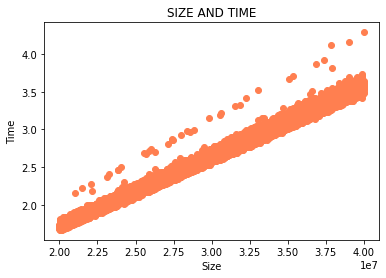

In [12]:
plt.scatter(X, y, c='coral')
plt.gca().update(dict(title='SIZE AND TIME', xlabel='Size', ylabel='Time'))

## Split Data

***Phân chia dữ liệu thành hai tập train và test, trong đó tập test chiếm 20%***

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Model

***Import model từ sklearn***

Train model với tập dữ liệu train và in ra các tham số

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [16]:
model.fit(X_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     9.271232808231004e-08
Model intercept: -0.13783554715379953


## Predict Test Set

***Dùng model đã train ở trên, dự đoán trên tập test***

Màu cam được biểu diễn là các điểm dữ liệu, màu xanh là đường thẳng theo hàm hypothesis có được sau khi train model

In [0]:
y_pre = model.predict(X_test[:, np.newaxis])

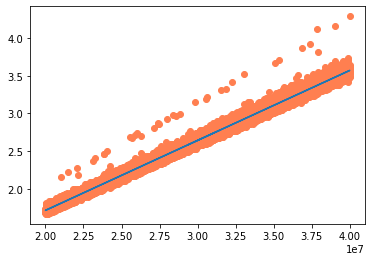

In [19]:
plt.scatter(X, y, c='coral')
plt.plot(X_test,y_pre)

## Evaluate the model

***Gía trị sai số trung bình***

So với tập dữ liệu ở round 2, giá trị sai số trung bình của round 3 cao hơn khá nhiều (0,0427 so với 0.00821)

In [0]:
evl = abs(y_pre - y_test)

In [33]:
test_err_tb = evl.mean()
print('Sai số trung bình:', test_err_tb)

Sai số trung bình: 0.04279038268781475


In [0]:
err_tb = evl/y_test
err_tb = err_tb.mean()

In [43]:
err_tb

0.01606861016099637

In [45]:
print('Phan tram sai so tren gia tri thuc trung binh:', err_tb*100,'%')

Phan tram sai so tren gia tri thuc trung binh: 1.606861016099637 %


## Tạo model mới

In [0]:
X = 

In [0]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)